# Finance Prediction

### 1) Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2) Data loading

In [2]:
#load data
df = pd.read_csv('Finance_prediction.csv')

# display data
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### 3) Data Profiling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [5]:
#checking if there is missing rows
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#check total duplicated rows
df.duplicated().sum()

0

### 4) Data Cleaning

In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
df['Gender'].fillna('Female',inplace=True)

In [11]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
df['Married'].fillna('No',inplace=True)

In [13]:
df['Dependents'].fillna(df['Dependents'].mode(),inplace=True)

In [14]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
df['Self_Employed'].fillna('Yes',inplace=True)

In [16]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [17]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [18]:
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)

In [19]:
df['Dependents'].fillna('0',inplace=True)

In [20]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### 5) Exploratory data analysis (EDA)

### Investigating our loan status 


In [22]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

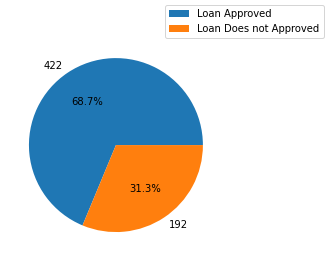

In [23]:
status_count = df['Loan_Status'].value_counts()
plt.pie(status_count,labels=status_count,autopct='%1.1f%%')
plt.figlegend(['Loan Approved','Loan Does not Approved']);


#### Relationship between Property area and Loan status

In [24]:
pd.crosstab(df['Property_Area'],df['Loan_Status'])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


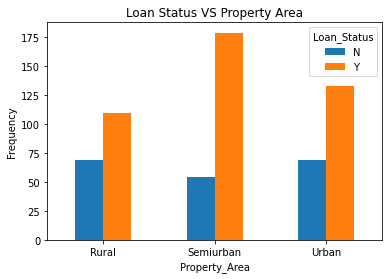

In [25]:
pd.crosstab(df['Property_Area'],df['Loan_Status']).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Loan Status VS Property Area')
plt.xticks(rotation=0);

#### Applicant Income Distribution

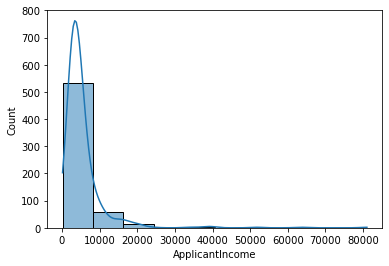

In [26]:
sns.histplot(df['ApplicantIncome'],bins=10,kde=True);

In [27]:
pd.crosstab(df['Credit_History'],df['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


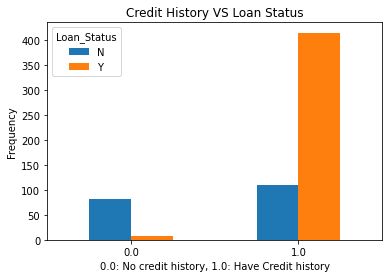

In [28]:
pd.crosstab(df['Credit_History'],df['Loan_Status']).plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('0.0: No credit history, 1.0: Have Credit history')
plt.title('Credit History VS Loan Status')
plt.xticks(rotation=0);

#### Correlation analysis 

In [29]:
from sklearn.preprocessing import LabelEncoder

df.drop('Loan_ID',axis=1,inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    print(f'{col}: {df[col].unique()}')

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [30]:
le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
    print(f'{col}: {df[col].unique()}')

Gender: [1 0]
Married: [0 1]
Dependents: [0 1 2 3]
Education: [0 1]
Self_Employed: [0 1]
Property_Area: [2 0 1]
Loan_Status: [1 0]


In [31]:
corr_matrix = df.corr().round(2)
corr_matrix

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,0.34,0.15,0.06,-0.04,0.01,0.08,0.06,-0.07,0.02,-0.02,0.03
Married,0.34,1.00,0.34,0.02,-0.02,0.05,0.08,0.15,-0.10,0.01,0.00,0.08
Dependents,0.15,0.34,1.00,0.06,0.04,0.12,0.03,0.16,-0.10,-0.04,-0.00,0.01
Education,0.06,0.02,0.06,1.00,-0.02,-0.14,-0.06,-0.17,-0.07,-0.07,-0.07,-0.09
Self_Employed,-0.04,-0.02,0.04,-0.02,1.00,0.12,0.03,0.11,-0.04,0.04,-0.02,0.01
ApplicantIncome,0.01,0.05,0.12,-0.14,0.12,1.00,-0.12,0.57,-0.05,-0.02,-0.01,-0.00
CoapplicantIncome,0.08,0.08,0.03,-0.06,0.03,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06
LoanAmount,0.06,0.15,0.16,-0.17,0.11,0.57,0.19,1.00,0.04,-0.00,-0.05,-0.03
Loan_Amount_Term,-0.07,-0.10,-0.10,-0.07,-0.04,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02
Credit_History,0.02,0.01,-0.04,-0.07,0.04,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54


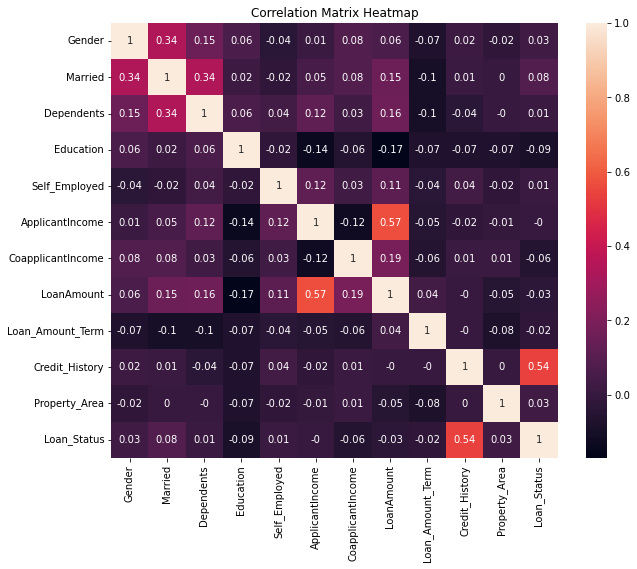

In [32]:
## plot corr matrix into heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix Heatmap');

### 6) Predictive Modelling

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [34]:
predictors = df.iloc[:,:-1]
predictors

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [35]:
label = df.iloc[:,-1]
label

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

#### Splitting data into train and test

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(predictors,label,test_size=0.3,random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.metrics import accuracy_score,classification_report

In [39]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

_Here we created a function to check which Machine Learning Algorithm will be the best fit for our model. We will select the one with highest accuracy._

In [40]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



LogisticRegression()

In [41]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.25      0.12      0.16        65
           1       0.63      0.80      0.70       120

    accuracy                           0.56       185
   macro avg       0.44      0.46      0.43       185
weighted avg       0.49      0.56      0.51       185



KNeighborsClassifier()

In [42]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.51      0.54      0.53        65
           1       0.74      0.72      0.73       120

    accuracy                           0.66       185
   macro avg       0.63      0.63      0.63       185
weighted avg       0.66      0.66      0.66       185



DecisionTreeClassifier()

In [43]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.76      0.48      0.58        65
           1       0.76      0.92      0.83       120

    accuracy                           0.76       185
   macro avg       0.76      0.70      0.71       185
weighted avg       0.76      0.76      0.75       185



RandomForestClassifier()

In [44]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

1.0
0.7621621621621621


_Our training and testing scores are a little different from each other. But we need scores close to each other for our model to work best._ 

#### Hyperparameter Tuning

In [45]:
for i in range(1,51):
    rf1 = RandomForestClassifier(max_depth=i)
    rf1.fit(X_train,y_train)
    y_pred = rf1.predict(X_test)
    print(f"{i} = {accuracy_score(y_test,y_pred)}")

1 = 0.6918918918918919
2 = 0.7783783783783784
3 = 0.7837837837837838
4 = 0.7837837837837838
5 = 0.7891891891891892
6 = 0.7891891891891892
7 = 0.7837837837837838
8 = 0.7783783783783784
9 = 0.7837837837837838
10 = 0.7945945945945946
11 = 0.8
12 = 0.7513513513513513
13 = 0.7621621621621621
14 = 0.772972972972973
15 = 0.7837837837837838
16 = 0.7567567567567568
17 = 0.7783783783783784
18 = 0.7837837837837838
19 = 0.7837837837837838
20 = 0.7567567567567568
21 = 0.7675675675675676
22 = 0.7675675675675676
23 = 0.7675675675675676
24 = 0.7567567567567568
25 = 0.7891891891891892
26 = 0.7621621621621621
27 = 0.772972972972973
28 = 0.7621621621621621
29 = 0.7513513513513513
30 = 0.7567567567567568
31 = 0.7675675675675676
32 = 0.7837837837837838
33 = 0.7621621621621621
34 = 0.7621621621621621
35 = 0.7783783783783784
36 = 0.772972972972973
37 = 0.7675675675675676
38 = 0.7783783783783784
39 = 0.7621621621621621
40 = 0.772972972972973
41 = 0.7837837837837838
42 = 0.7675675675675676
43 = 0.7837837837837

_Here, the maximum accuracy is on index 11, so we will select max_depth = 11_

In [47]:
for i in range(2,50):
    rf2 = RandomForestClassifier(min_samples_split=i)
    rf2.fit(X_train,y_train)
    y_pred = rf2.predict(X_test)
    print(f"{i} = {accuracy_score(y_test,y_pred)}")

2 = 0.7675675675675676
3 = 0.7621621621621621
4 = 0.7891891891891892
5 = 0.7945945945945946
6 = 0.7945945945945946
7 = 0.7837837837837838
8 = 0.7945945945945946
9 = 0.7837837837837838
10 = 0.8
11 = 0.7783783783783784
12 = 0.7891891891891892
13 = 0.7891891891891892
14 = 0.7945945945945946
15 = 0.7891891891891892
16 = 0.7891891891891892
17 = 0.7837837837837838
18 = 0.7891891891891892
19 = 0.7891891891891892
20 = 0.7891891891891892
21 = 0.7837837837837838
22 = 0.7891891891891892
23 = 0.7837837837837838
24 = 0.7891891891891892
25 = 0.7891891891891892
26 = 0.7891891891891892
27 = 0.7837837837837838
28 = 0.7891891891891892
29 = 0.7891891891891892
30 = 0.7837837837837838
31 = 0.7891891891891892
32 = 0.7837837837837838
33 = 0.7891891891891892
34 = 0.7891891891891892
35 = 0.7837837837837838
36 = 0.7837837837837838
37 = 0.7891891891891892
38 = 0.7837837837837838
39 = 0.7945945945945946
40 = 0.7891891891891892
41 = 0.7837837837837838
42 = 0.7837837837837838
43 = 0.7837837837837838
44 = 0.78378378

_Here, the maximum accuracy is on index 10, so we will select min_samples_split = 10_

In [48]:
for i in range(1,51):
    rf3 = RandomForestClassifier(min_samples_leaf=i)
    rf3.fit(X_train,y_train)
    y_pred = rf3.predict(X_test)
    print(f"{i} = {accuracy_score(y_test,y_pred)}")

1 = 0.7783783783783784
2 = 0.772972972972973
3 = 0.7783783783783784
4 = 0.7837837837837838
5 = 0.7837837837837838
6 = 0.7837837837837838
7 = 0.7837837837837838
8 = 0.7837837837837838
9 = 0.7837837837837838
10 = 0.7837837837837838
11 = 0.7837837837837838
12 = 0.7837837837837838
13 = 0.7837837837837838
14 = 0.7783783783783784
15 = 0.7783783783783784
16 = 0.7837837837837838
17 = 0.7837837837837838
18 = 0.7837837837837838
19 = 0.7837837837837838
20 = 0.7621621621621621
21 = 0.772972972972973
22 = 0.7135135135135136
23 = 0.745945945945946
24 = 0.6918918918918919
25 = 0.772972972972973
26 = 0.6972972972972973
27 = 0.6810810810810811
28 = 0.7297297297297297
29 = 0.7243243243243244
30 = 0.6702702702702703
31 = 0.6756756756756757
32 = 0.6810810810810811
33 = 0.7405405405405405
34 = 0.6648648648648648
35 = 0.6594594594594595
36 = 0.6486486486486487
37 = 0.6486486486486487
38 = 0.6486486486486487
39 = 0.6486486486486487
40 = 0.6486486486486487
41 = 0.6486486486486487
42 = 0.6486486486486487
43 = 

_Here, the maximum accuracy is on index 10, so we will select min_samples_leaf = 10_

In [49]:
rf4 = DecisionTreeClassifier(max_depth=11,min_samples_leaf=10,min_samples_split=10)
mymodel(rf4)

              precision    recall  f1-score   support

           0       0.60      0.52      0.56        65
           1       0.76      0.81      0.78       120

    accuracy                           0.71       185
   macro avg       0.68      0.67      0.67       185
weighted avg       0.70      0.71      0.70       185



DecisionTreeClassifier(max_depth=11, min_samples_leaf=10, min_samples_split=10)

In [51]:
print(rf4.score(X_train,y_train))
print(rf4.score(X_test,y_test))

0.8368298368298368
0.7081081081081081


### Creating model

In [59]:
# Function to predict loan approval
def Predtest():
    Gender = int(input("Enter the gender.\nIf Male, enter 1.\nIf Female, enter 0.\nYou entered: "))
    Married = int(input("Enter if you are married or not.\nIf Married, enter 1.\nIf Single, enter 0.\nYou entered: "))
    Dependents = int(input("Enter the number of dependents: "))
    Education = int(input("Enter the education.\nIf graduated, enter 0.\nIf Not Graduated, enter 1.\nYou entered: "))
    Self_employed = int(input("Enter if you are self-employed or not.\nIf Self Employed, enter 1.\nIf Not Self Employed, enter 0.\nYou entered: "))
    ApplicantIncome = int(input("Enter the applicant income: "))
    CoApplicantIncome = int(input("Enter the co-applicant income: "))
    LoanAmount = int(input("Enter the loan amount: "))
    LoanAmountTerm = int(input("Enter the loan term: "))
    CreditHistory = int(input("Enter the credit history.\nIf any ongoing loan, enter 0.\nIf no ongoing loan, enter 1.\nYou entered: "))
    PropertyArea = int(input("Enter the property area.\nIf Urban, enter 2.\nIf Semi Urban, enter 1.\nIf rural, enter 0.\nYou entered: "))
    
    newx = [Gender, Married, Dependents, Education, Self_employed, ApplicantIncome, CoApplicantIncome, LoanAmount, LoanAmountTerm, CreditHistory, PropertyArea]
    # Assuming 'rf4' is your trained model
    yp = rf4.predict([newx])[0]
    
    if yp == 1:
        print("Congratulations! Your loan application is approved.")
    else:
        print("Sorry, your loan application is not approved.")

_In order to check if our model is working properly or not, we need to test it._

_Here we have some existing values of the given parameters for testing if the loan will get approved or not._

### Model Testing

#### Testing if our model is working properly or not.

>Example:-
- Gender = 1
- Married = 0
- Dependents = 0
- Education = 0
- Self_employed = 0
- ApplicantIncome = 5849
- CoApplicantIncome = 0
- LoanAmount = 128
- LoanAmountTerm = 360
- CreditHistory = 1
- PropertyArea = 2
- LoanStatus = 1

#### Here the loan will get approved

In [60]:
# Call the function to predict loan approval
Predtest()

Enter the gender.
If Male, enter 1.
If Female, enter 0.
You entered: 1
Enter if you are married or not.
If Married, enter 1.
If Single, enter 0.
You entered: 0
Enter the number of dependents: 0
Enter the education.
If graduated, enter 0.
If Not Graduated, enter 1.
You entered: 0
Enter if you are self-employed or not.
If Self Employed, enter 1.
If Not Self Employed, enter 0.
You entered: 0
Enter the applicant income: 5849
Enter the co-applicant income: 0
Enter the loan amount: 128
Enter the loan term: 360
Enter the credit history.
If any ongoing loan, enter 0.
If no ongoing loan, enter 1.
You entered: 1
Enter the property area.
If Urban, enter 2.
If Semi Urban, enter 1.
If rural, enter 0.
You entered: 2
Congratulations! Your loan application is approved.


#### Here the loan will not get approved

>Example:-
- Gender = 1
- Married = 1
- Dependents = 1
- Education = 0
- Self_employed = 0
- ApplicantIncome = 4583
- CoApplicantIncome = 1508
- LoanAmount = 128
- LoanAmountTerm = 360
- CreditHistory = 1
- PropertyArea = 0
- LoanStatus = 0

In [62]:
# Call the function to predict loan approval
Predtest()

Enter the gender.
If Male, enter 1.
If Female, enter 0.
You entered: 1
Enter if you are married or not.
If Married, enter 1.
If Single, enter 0.
You entered: 1
Enter the number of dependents: 1
Enter the education.
If graduated, enter 0.
If Not Graduated, enter 1.
You entered: 0
Enter if you are self-employed or not.
If Self Employed, enter 1.
If Not Self Employed, enter 0.
You entered: 0
Enter the applicant income: 4583
Enter the co-applicant income: 1508
Enter the loan amount: 128
Enter the loan term: 360
Enter the credit history.
If any ongoing loan, enter 0.
If no ongoing loan, enter 1.
You entered: 1
Enter the property area.
If Urban, enter 2.
If Semi Urban, enter 1.
If rural, enter 0.
You entered: 0
Sorry, your loan application is not approved.


### Since both the outcome are correct. Our model is successful.

## Prescriptive Analysis

Certainly, let's break it down into simpler terms. Prescriptive analysis for a loan approval dataset involves making informed recommendations about whether to approve or reject loan applications. Here's how you can approach it in a more straightforward way:

1. **Understand Key Factors:** First, identify which factors matter the most in deciding whether to approve a loan. Things like credit history, income, and the loan amount are typically crucial.

2. **Set Rules:** Create a set of clear rules for making loan decisions. For example, if an applicant's credit score is above a certain level, you might approve the loan; if it's below that level, you might reject it.

3. **Automate the Process:** Build a system that can automatically evaluate loan applications based on these rules. It can provide quick recommendations for approval or rejection.

4. **Human Review:** For cases that don't fit neatly into the rules, include a step where a human expert can review and make a decision.

5. **Keep Records:** Ensure that all decisions are well-documented for legal and regulatory purposes. Compliance is essential.

6. **Regular Updates:** Your rules and the system should evolve over time. Update them to match changing market conditions and business needs.

7. **Testing and Feedback:** Test how well your new approach works by comparing it with the old one. Collect feedback and adjust your rules as needed.

8. **Monitoring and Reporting:** Keep an eye on how well your system is performing. Look at metrics like approval rates and how many loans are being repaid on time.

9. **Scalability:** Make sure your system can handle a large number of loan applications efficiently, and consider using cloud-based solutions for flexibility.

10. **Fairness:** Be aware of potential biases in your decision-making process. Regularly check for bias to ensure fair and equal loan approvals.
